

# Data Exploration and Visualizations

*Exploratory Data Analysis (EDA)* is the process where a Data Scientist gathers information 
from a dataset. This inclues knowing the source of the data, an understading 
of what the data itself represents, the features that describe the data, the type 
of data in each feature, and what stories comes out from the data. 

<img src='https://d3lkc3n5th01x7.cloudfront.net/wp-content/uploads/2023/05/08040831/Exploratory-Data-Analysis.png'>

Data visualisation is the most agile method to acquire information from a dataset.

# Goals of this lecture
0. Know your data before you start. 
0. Inspect data for faults
0. How to explore your data. 
0. How to find relationships mathematically and visually. 
0. To give you the building blocks on visualizing data with python. 

In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# First things first... load the data

In [2]:
df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Let's understand this dataset.. 
## WTH is a Culmen?
<img src='https://pbs.twimg.com/media/EaAXQn8U4AAoKUj.jpg:large' height=450 style="background-color:white;">

In [3]:
df['species'].value_counts()

species
Adelie       153
Gentoo       127
Chinstrap     68
Name: count, dtype: int64

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' height=450 style="background-color:white;">

<img src="https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png" height=450>

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/15/Palmer_archipelago%2C_Antarctica.jpg)

### Lets see how 'big' our data is by printing its shape.

In [4]:
print(df.shape)

(348, 7)


# Lets look at the description and information about our dataset.
* Why, it gives us a high level summary view of our data.

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,346.000000,346.000000,346.000000,346.000000
mean,44.136416,17.149133,201.447977,4219.916185
std,6.237503,1.970172,16.124117,817.796595
min,32.100000,13.100000,172.000000,2700.000000
25%,39.350000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.675000,18.700000,213.000000,4800.000000
max,100.200000,21.500000,349.000000,6891.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            348 non-null    object 
 1   island             348 non-null    object 
 2   culmen_length_mm   346 non-null    float64
 3   culmen_depth_mm    346 non-null    float64
 4   flipper_length_mm  346 non-null    float64
 5   body_mass_g        346 non-null    float64
 6   sex                338 non-null    object 
dtypes: float64(4), object(3)
memory usage: 19.2+ KB


# Lets check if we have any null values in our data.

In [7]:
df.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False
345,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False


### Remove, aka Drop, our null values

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
print(f'Shape before dropping NA: {df.shape}')

# df.dropna(inplace=True)
df = df.dropna()

# Sanity Check
print(f'Shape after dropping NA: {df.shape}')

# print how many null values there are
df.isnull().sum()


Shape before dropping NA: (348, 7)
Shape after dropping NA: (338, 7)


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Instead of just dropping Null values, you can fill them in creative ways.  
[here is a tutorial about that](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

```python
df = pd.read_csv('data/penguins.csv')
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(), inplace=True)
df.isnull().sum()
```


---

# Check for duplicate rows.

In [10]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
df.duplicated()

Number of duplicated rows: 3


0      False
1      False
2      False
4      False
5      False
       ...  
343    False
344     True
345     True
346     True
347    False
Length: 338, dtype: bool

# Drop said duplicates...
Because `df.duplicated()` returns a selection boolean mask, it's `True` when the row is duplicated, how could we use that filter to remove the duplicated rows from our dataset..?

In [11]:
# Ask students to solve this one...
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(338, 7) before dropping dupes
(335, 7) after dropping dupes


# Plotting
`df.plot(kind='scatter', x='COLUMN_NAME', y='COLUMN_NAME')`
```
The kinds of plot we can produce:
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter plot
        - 'hexbin' : hexbin plot.`
```

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

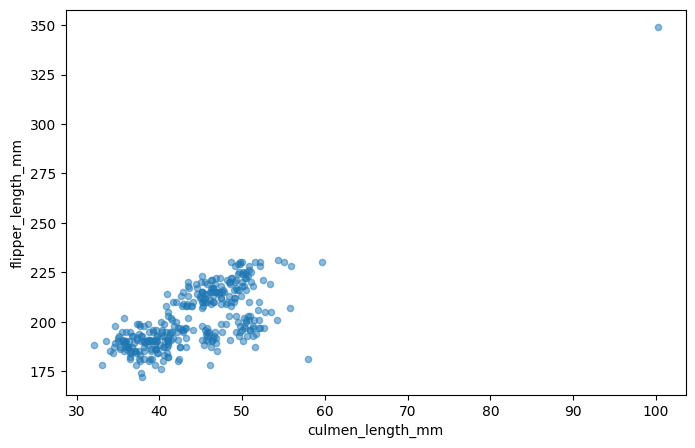

In [12]:
df.plot(
    kind='scatter', 
    x='culmen_length_mm', 
    y='flipper_length_mm',
    figsize=(8, 5),
    alpha=0.5)

# How do we remove this outlier...?

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

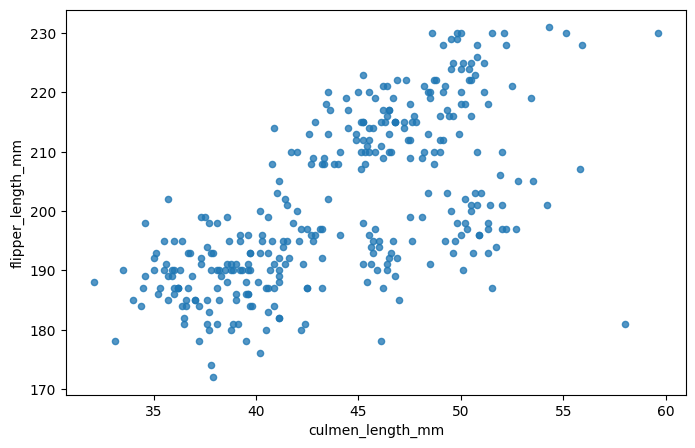

In [13]:
# Ask students to see if they can answer this. 

select_condition = df.culmen_length_mm < 70

df = df[select_condition]

df.plot(
    kind='scatter', 
    x='culmen_length_mm', 
    y='flipper_length_mm', 
    figsize=(8, 5), 
    alpha=0.77)

# More plotting.

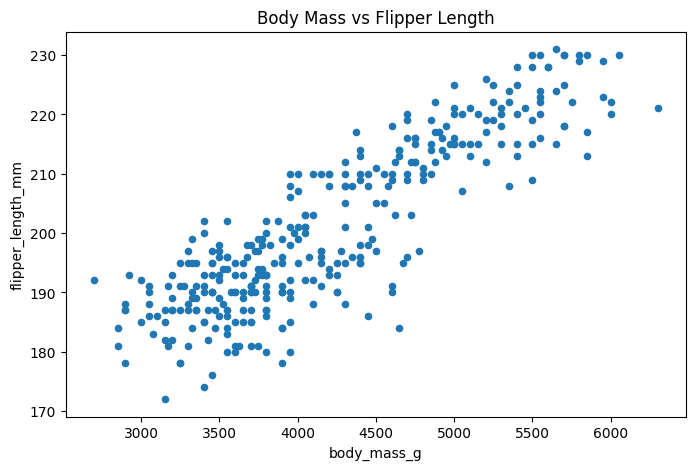

In [14]:
df.plot(kind='scatter', 
        x='body_mass_g', 
        y='flipper_length_mm', 
        figsize=(8,5),
        title='Body Mass vs Flipper Length');

# Bar Charts

In [15]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# Plotting Group-by Objects

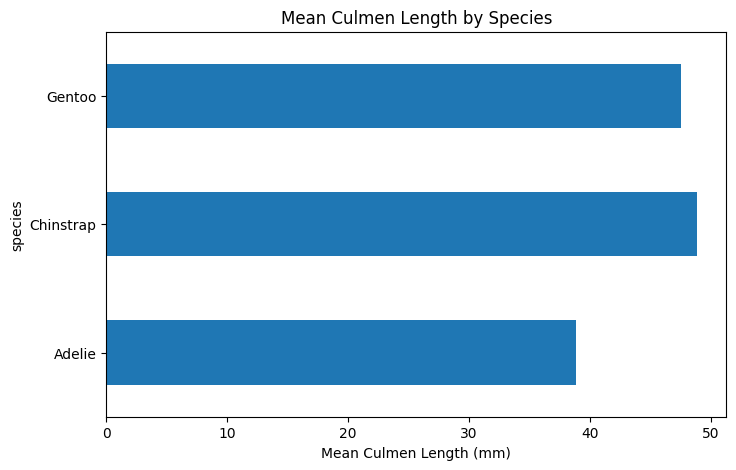

In [16]:
# Find the mean culmen_length_mm for each of the species 
gb = df.groupby('species')
# Find the mean
culmen_mean = gb['culmen_length_mm'].mean()

# Plot it
culmen_mean.plot(kind='barh',
                figsize=(8,5), 
                 xlabel='Mean Culmen Length (mm)', 
                 title='Mean Culmen Length by Species');

# Histograms are great for finding what type of distribution the data is.

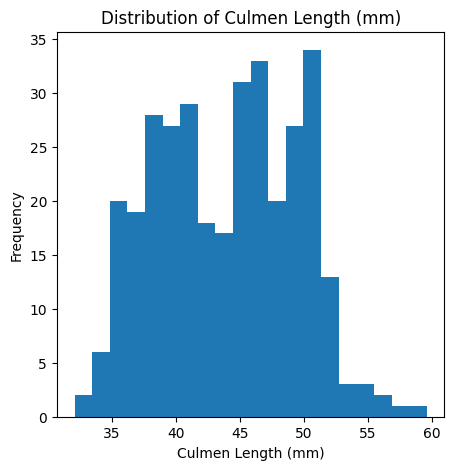

In [17]:
df['culmen_length_mm'].plot(kind='hist', 
                            bins=20, 
                            figsize=(5,5),
                            title='Distribution of Culmen Length (mm)',
                            xlabel='Culmen Length (mm)');

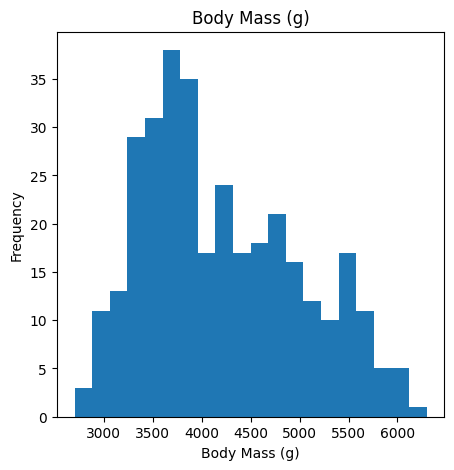

In [18]:
df['body_mass_g'].plot(kind='hist', bins=20, title='Body Mass (g)', xlabel='Body Mass (g)', figsize=(5,5));

# Enter [Seaborn](https://seaborn.pydata.org/)
Seaborn is a visualization library that makes pretty plotting easy and fun. 
* Gallery of Examples:  https://seaborn.pydata.org/examples/index.html


### Scatter plots with Seaborn
* [Scatterplot Reference](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

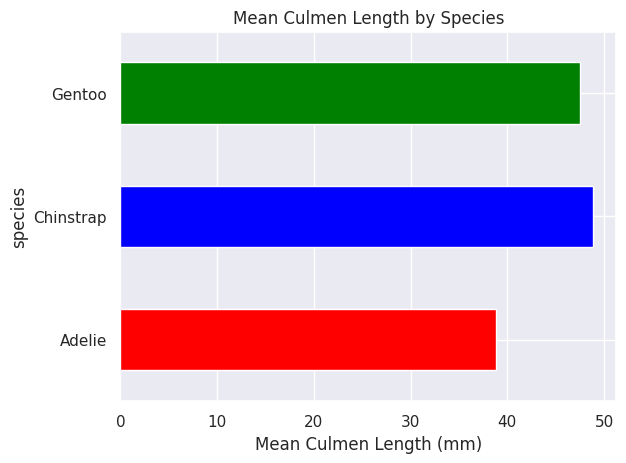

In [19]:
import seaborn as sns
# Dont forget to call sns.set()! 
sns.set()

# This tells the program to use the seaborn styles 
# Which make our graphs awesome looking

# # Call using sns, and pass in the data frame.
# ax = sns.scatterplot(data=df, x='culmen_length_mm', y='body_mass_g', hue='species');

# Find the mean culmen_length_mm for each of the species 
gb = df.groupby('species')


culmen_mean = gb['culmen_length_mm'].mean()

# Make a bar plot of said means
culmen_mean.plot(kind='barh', 
                 color=['red', 'blue', 'green'],
                 xlabel='Mean Culmen Length (mm)', 
                 title='Mean Culmen Length by Species');

### Seaborn plotting functions return an `axis` object aka `ax`, which you can then set chart options on. 
* All the options you can set using the axis object.
    * https://matplotlib.org/3.3.1/api/axes_api.html

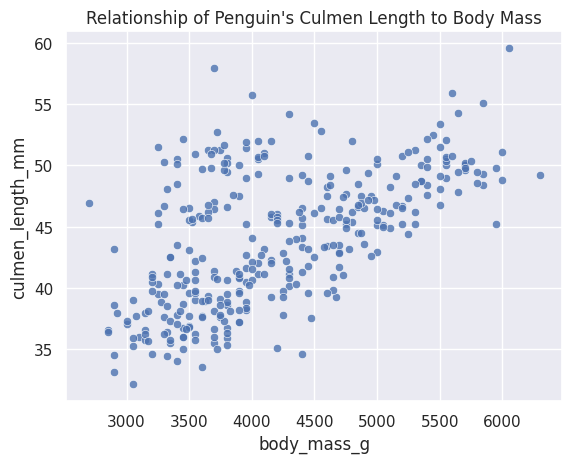

In [20]:
ax = sns.scatterplot(
    data=df, 
    x='body_mass_g', 
    y='culmen_length_mm', 
    alpha=0.8);

ax.set_title("Relationship of Penguin's Culmen Length to Body Mass");

# Changing Axes

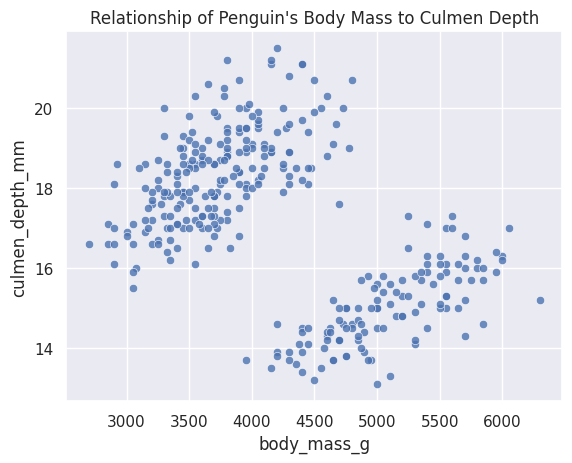

In [21]:
# Say you wanted to change the x-axis
ax = sns.scatterplot(data=df, 
                     x='body_mass_g', 
                     y='culmen_depth_mm', 
                     alpha=0.8);

ax.set_title("Relationship of Penguin's Body Mass to Culmen Depth");

## What if we wanted to change the color of the markers based on the species of penguin?
* Have students read documentation it to see if they can figure it out.
    * https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

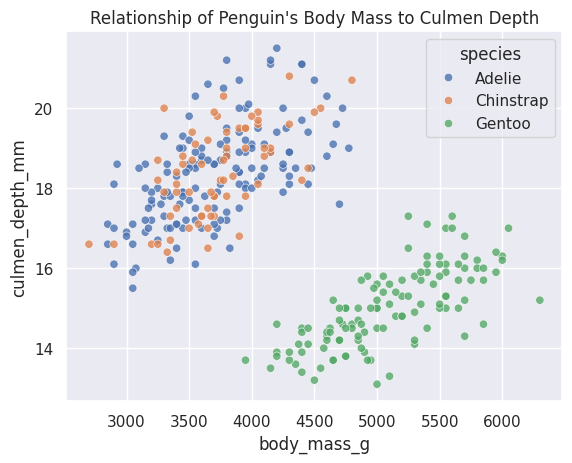

In [22]:
ax = sns.scatterplot(data=df, 
                     x='body_mass_g', 
                     y='culmen_depth_mm', 
                     alpha=0.8, 
                     hue='species');

ax.set_title("Relationship of Penguin's Body Mass to Culmen Depth");

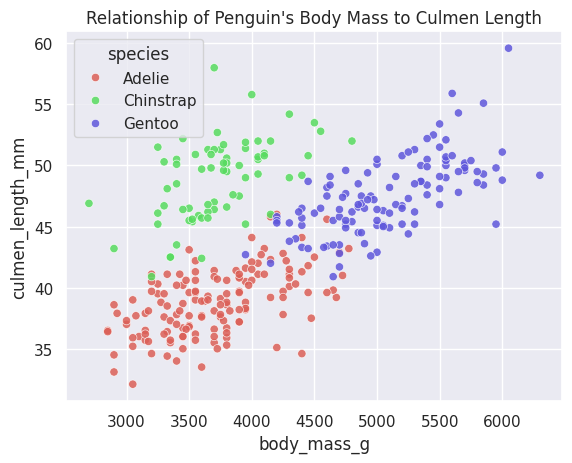

In [23]:
ax = sns.scatterplot(data=df, 
                x='body_mass_g', 
                y='culmen_length_mm', 
                hue='species', 
                palette='hls',
                alpha=0.85);

ax.set_title("Relationship of Penguin's Body Mass to Culmen Length");

# The super scatter plot

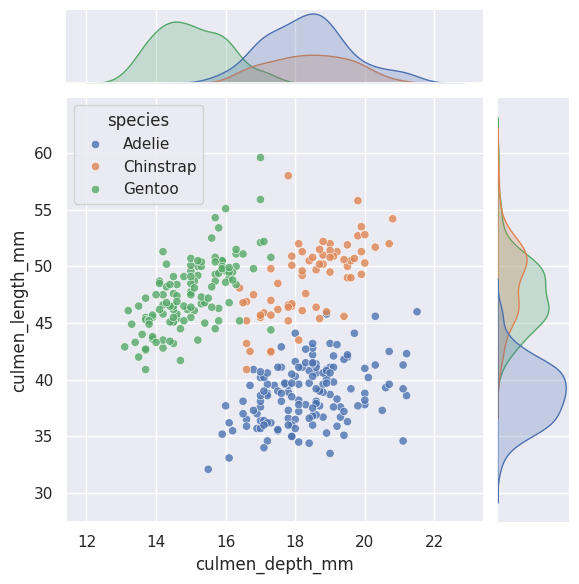

In [24]:
sns.jointplot(data=df, x='culmen_depth_mm', y='culmen_length_mm', hue='species', alpha=0.8);

## Box & Whisker Plots 
* A five-number summary turned into a picture:

1. Minimum (bottom whisker) – smallest non-outlier value.
2. Q1 (25th percentile) – where 25% of the data lies below this point.
3. Median (50th percentile) – the middle of the data.
4. Q3 (75th percentile) – where 75% of the data lies below this point.
5. Maximum (top whisker) – largest non-outlier value.

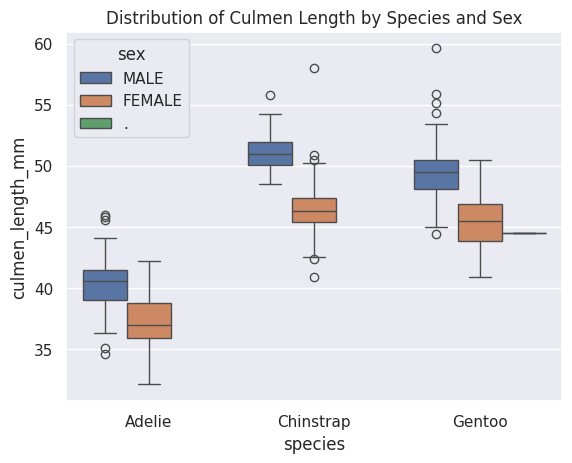

In [25]:
ax = sns.boxplot(data=df, x='species', y='culmen_length_mm', hue='sex');
ax.set_title("Distribution of Culmen Length by Species and Sex");

## The violin plot
* They take everything a box plot shows… and adds a kernel density estimation (KDE) on each side.
* AKA showing you the distribution of the data

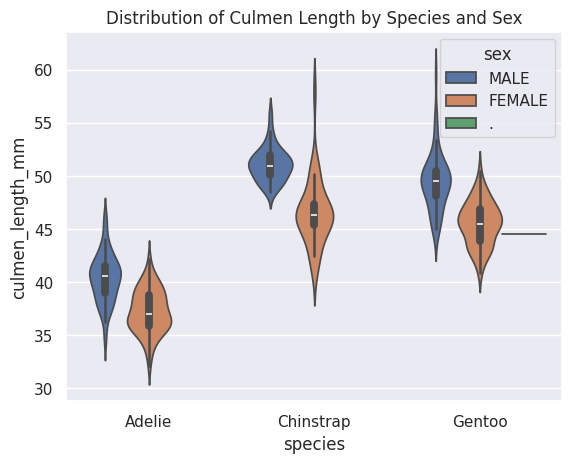

In [26]:
ax = sns.violinplot(data=df, x='species', y='culmen_length_mm', hue='sex');
ax.set_title("Distribution of Culmen Length by Species and Sex");

## The catch all plot function

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


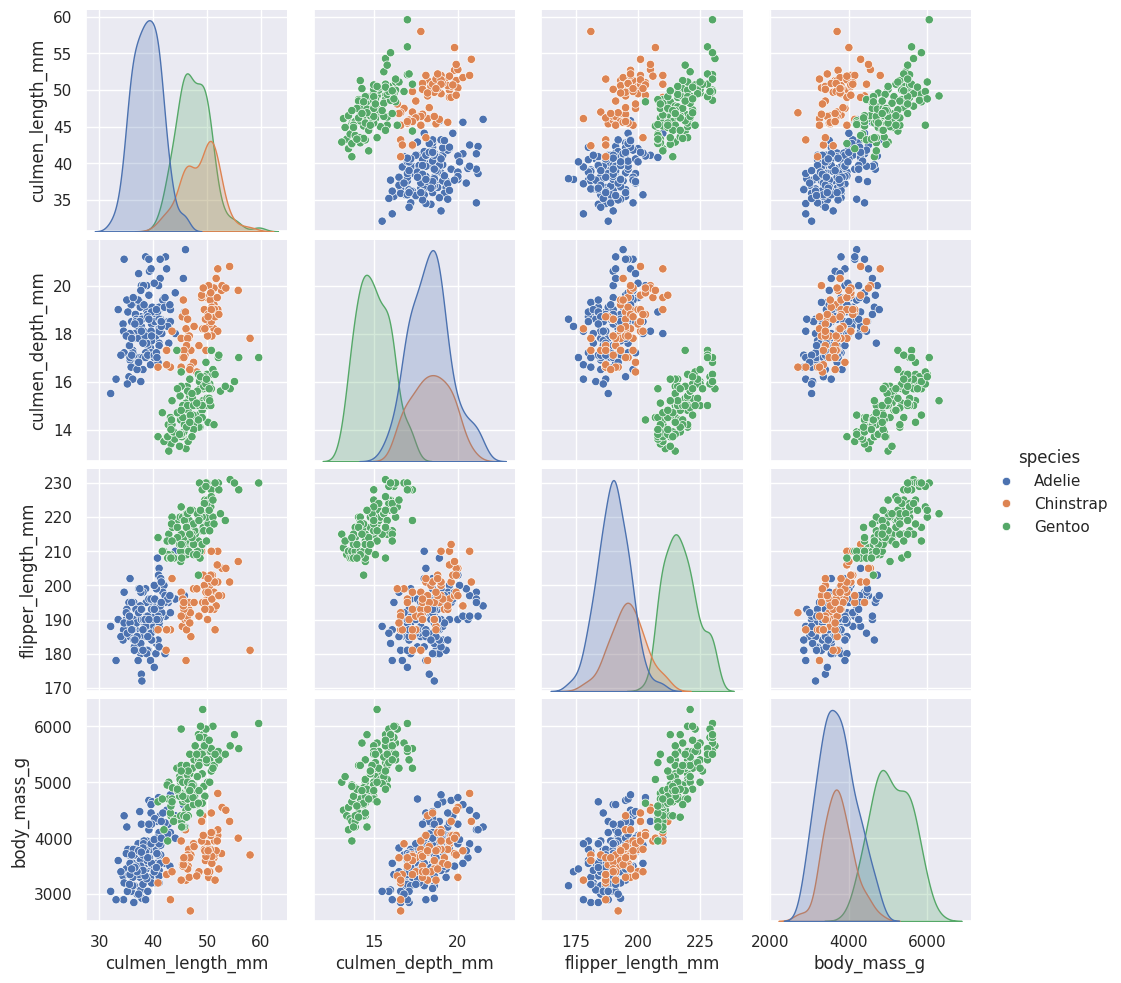

In [27]:
# pairplot is a great way to quickly visualize pairwise relationships in a dataset
sns.pairplot(df, hue='species', size=2.5);

In [28]:
# getting a sample of the data
sample_df = df.sample(frac=0.1);
sample_df.shape

(33, 7)

## Plotting the line of best fit
* Using `sns.regplot` and `sns.lmplot` you can easily plot regression analyses.
    - `sns.regplot`: single line of best fit
    - `sns.lmplot`: multiple lines

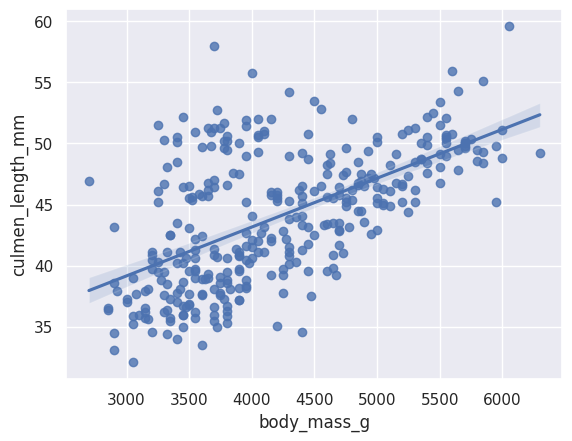

In [29]:
sns.regplot(data=df, x='body_mass_g', y='culmen_length_mm', scatter_kws={'alpha': 0.8});

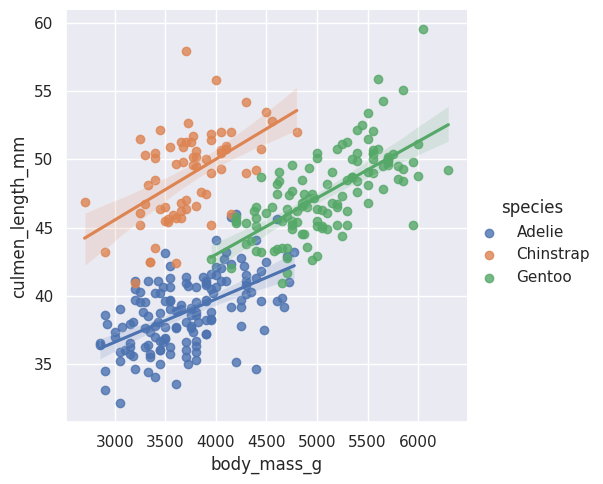

In [30]:
sns.lmplot(data=df, x='body_mass_g', y='culmen_length_mm', hue='species', scatter_kws={'alpha': 0.8});

# Finding Correlations in your data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. 

[Learn more here](https://en.wikipedia.org/wiki/Correlation_and_dependence)

<img src='https://www.onlinemathlearning.com/image-files/correlation-coefficient.png' width=500>

In [ ]:
# This functions finds the correlation between all numerical values.
df.corr() # why doesn't this work?

ValueError: could not convert string to float: 'Adelie'

In [ ]:
# some columns are non-numeric
df.corr(numeric_only=True)

# Easily visualize your correlations with a heatmap.

<Axes: >

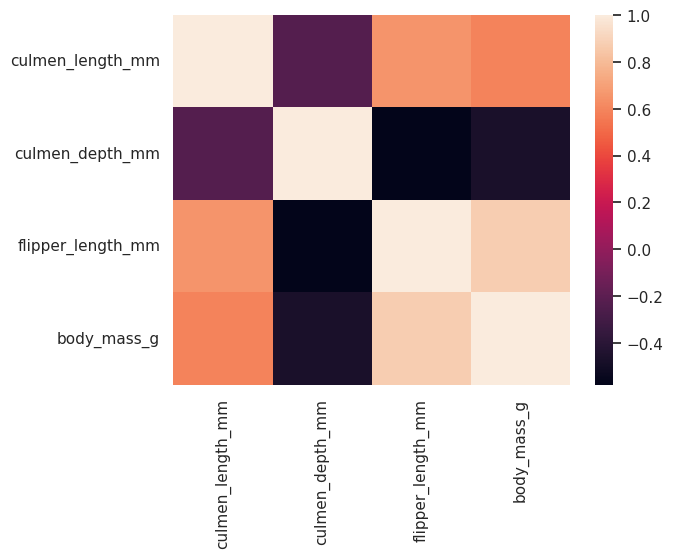

In [32]:
sns.heatmap( df.corr(numeric_only=True) )

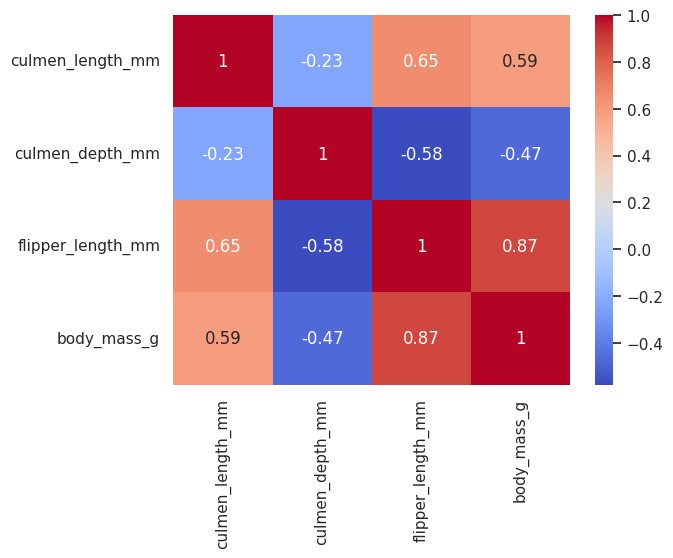

In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap='Spectral')

# let's display the correlation values
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm');


---


# Main take aways I want you to remember. 
1. Use common sense, know what your data columns are before anything.

2. Always inspect your data for nulls, dupes, and outliers. 
2. Plotting with pandas is easy, but limitied. Plotting libs usually return an `axis` object. 
3. Seaborn is great, but there are many many more libs for python for data viz. 


##### End of this lecture. 

---